# Entendimiento y preparacion de los datos

In [2]:
 # Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions
 # librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
# Manejo de gráficas
!pip install scikit-plot
!pip install nltk
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Asegúrate de tener los recursos descargados
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np


import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data=pd.read_excel('data/Datos_proyecto.xlsx')

In [5]:
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3


C:\Users\esteb\AppData\Local\Temp\ipykernel_8540\98627521.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['labels'])
C:\Users\esteb\AppData\Local\Temp\ipykernel_8540\98627521.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['labels']).plot.bar()


<Axes: xlabel='labels'>

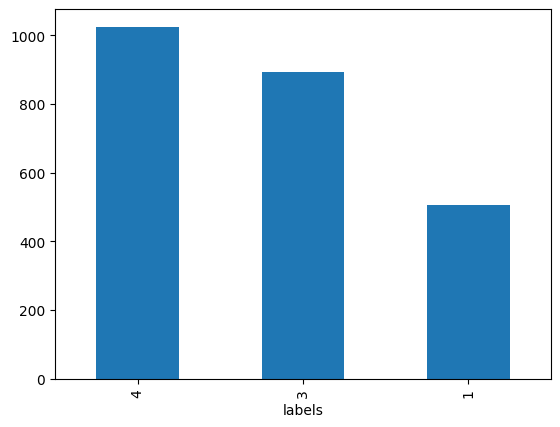

In [6]:
pd.value_counts(data['labels'])
pd.value_counts(data['labels']).plot.bar()

In [7]:
data.isnull().sum()
data_t = data

In [8]:

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
#textos['Moda'] =
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

In [9]:
textos

,textos,labels,Conteo,Max,Min
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1
2,"Además, la formación de especialistas en medic...",3,659,15,1
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1
4,Este grupo se centró en las personas que padec...,3,608,14,0
...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1


# Preparacion de los datos

In [10]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = [word.lower() if word is not None else '' for word in words]
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   p = inflect.engine()
   print(words)
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = p.number_to_words(word)
           new_words.append(new_word)
           print("if " + new_word)
       else:
           new_words.append(word)
   return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

## tokenizacion

In [11]:
data_t['textos'] = data_t['textos'].apply(contractions.fix)

In [12]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t.head()

,textos,labels,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


In [13]:
data_t['words'].dropna()

0       [``, Aprendizaje, '', y, ``, educación, '', se...
1       [Para, los, niños, más, pequeños, (, bebés, y,...
2       [Además, ,, la, formación, de, especialistas, ...
3       [En, los, países, de, la, OCDE, se, tiende, a,...
4       [Este, grupo, se, centró, en, las, personas, q...
                              ...                        
2419    [La, tutoría, de, carrera, está, diseñada, par...
2420    [Fuente, :, Ministerio, de, Educación, ., Las,...
2421    [Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...
2422    [Sin, embargo, ,, estas, fallas, del, mercado,...
2423    [Aunque, existen, programas, para, convertirse...
Name: words, Length: 2424, dtype: object

In [14]:
data_t.shape

(2424, 3)

In [15]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2424 entries, 0 to 2423
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
2424 non-null   object
dtypes: object(1)
memory usage: 19.1+ KB


In [16]:
data_t['words1']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

['``', 'aprendizaje', "''", 'y', '``', 'educación', "''", 'se', 'consideran', 'sinónimos', 'de', 'escolarización', 'formal', '.', 'las', 'organizaciones', 'auxiliares', ',', 'como', 'las', 'editoriales', 'de', 'educación', ',', 'las', 'juntas', 'examinadoras', 'y', 'las', 'organizaciones', 'de', 'formación', 'de', 'docentes', ',', 'se', 'consideran', 'extensiones', 'de', 'los', 'acuerdos', 'establecidos', 'por', 'los', 'gobiernos', '.', 'este', 'marco', 'de', 'comprensión', 'se', 'ha', 'vuelto', 'cada', 'vez', 'más', 'inadecuado', '.']
['para', 'los', 'niños', 'más', 'pequeños', '(', 'bebés', 'y', 'niños', 'pequeños', ')', ',', 'la', 'capacitación', 'especializada', 'y', 'práctica', 'parece', 'estar', 'más', 'fuertemente', 'asociada', 'con', 'la', 'calidad', 'pedagógica', 'y', 'los', 'resultados', 'cognitivos', 'y', 'sociales', '.', 'los', 'educadores', 'de', 'la', 'primera', 'infancia', 'se', 'encuentran', 'con', 'entornos', 'sociales', 'cada', 'vez', 'más', 'complejos', 'y', 'se', 'e

,textos,labels,words,words1
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."


## normalizacion

In [17]:

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, pos="v") for w in words]

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas  # concatena las dos versiones

# Aplicar al DataFrame
data_t['words1'] = data_t['words1'].apply(stem_and_lemmatize)

data_t.head()


,textos,labels,words,words1
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaj, educacion, consideran, sinonimo, ..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[nino, ma, pequeno, bebe, nino, pequeno, capac..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[adema, formacion, especialista, medicina, gen..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[pais, ocd, tiend, pasar, curso, obligatorio, ..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, persona, padecen, trastorno, m..."


In [18]:
data_t['words1'] = data_t['words1'].apply(lambda x: ' '.join(map(str, x)))
data_t

,textos,labels,words,words1
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...",aprendizaj educacion consideran sinonimo escol...
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...",nino ma pequeno bebe nino pequeno capacitacion...
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...",adema formacion especialista medicina gener ta...
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...",pais ocd tiend pasar curso obligatorio optativ...
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...",grupo centro persona padecen trastorno mental ...
...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,"[La, tutoría, de, carrera, está, diseñada, par...",tutoria carrera disenada apoyar estudiant cons...
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,"[Fuente, :, Ministerio, de, Educación, ., Las,...",fuent ministerio educacion tasa interna retorn...
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...",two thousand and ten pnud sido pionero puesta ...
2422,"Sin embargo, estas fallas del mercado implican...",3,"[Sin, embargo, ,, estas, fallas, del, mercado,...",embargo falla mercado implican competencia si ...


In [19]:
data_t['texto_procesado'] = data_t['words1'].apply(lambda x: " ".join(x))

# Ver algunas filas de la columna
print(data_t['texto_procesado'].head(10))

# Ver cuántas filas quedaron vacías
print("Filas vacías:", (data_t['texto_procesado'] == "").sum())

# Ver si hay NaN
print("NaN:", data_t['texto_procesado'].isna().sum())


0    a p r e n d i z a j   e d u c a c i o n   c o ...
1    n i n o   m a   p e q u e n o   b e b e   n i ...
2    a d e m a   f o r m a c i o n   e s p e c i a ...
3    p a i s   o c d   t i e n d   p a s a r   c u ...
4    g r u p o   c e n t r o   p e r s o n a   p a ...
5    d a t o   n i v e l   s i s t e m a   d e r i ...
6    p r i n c i p   v e n t a j a   e v a l u a c ...
7    p a c i e n t   p u e d e n   e l e g i r   c ...
8    h e c h o   p r o b a b l   d e s i g n a c i ...
9    h e c h o   a u n q u   c h i l e   u r u g u ...
Name: texto_procesado, dtype: object
Filas vacías: 0
NaN: 0


In [20]:
print(data_t['words1'].head(10))

0    aprendizaj educacion consideran sinonimo escol...
1    nino ma pequeno bebe nino pequeno capacitacion...
2    adema formacion especialista medicina gener ta...
3    pais ocd tiend pasar curso obligatorio optativ...
4    grupo centro persona padecen trastorno mental ...
5    dato nivel sistema derivan cuestionario estudi...
6    princip ventaja evaluacion externa fiabilidad ...
7    pacient pueden elegir cualquier medico cabecer...
8    hecho probabl designacion universidad universi...
9    hecho aunqu chile uruguay indic pobreza simila...
Name: words1, dtype: object


In [21]:

# Usar directamente words1 como texto procesado
data_t['texto_procesado'] = data_t['words1']

# Inicializar TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar y transformar
X_tfidf = tfidf_vectorizer.fit_transform(data_t['texto_procesado'])

print("Dimensión de la matriz TF-IDF:", X_tfidf.shape)

# Ver primeras 10 palabras más relevantes del primer documento
import pandas as pd
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf[0].T.todense(), index=feature_names, columns=["tfidf"])
print(df_tfidf.sort_values(by="tfidf", ascending=False).head(10))


Dimensión de la matriz TF-IDF: (2424, 17947)
                   tfidf
consideran      0.467821
vuelto          0.261376
inadecuado      0.253425
escolarizacion  0.224198
formal          0.211112
organizaciones  0.209893
educacion       0.197261
organizacion    0.174313
marco           0.160771
examinadora     0.160487


# Modelos

## Arbol de decision (Esteban Benavides)

Se va a utilizar un arbol de decision pues es un modelo que se puede implementar y probar de manera rapida, de la misma manera es facil realizar el analisis sobre este

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separar features (X) y etiquetas (y)
X = X_tfidf
y = data_t['labels']   # Ajusta al nombre de tu columna de etiquetas

# Dividir en train y test (ej. 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Crear el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)  
# puedes ajustar max_depth, min_samples_split, etc.

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9134020618556701

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.88      0.84      0.86       101
           3       0.89      0.92      0.90       179
           4       0.95      0.95      0.95       205

    accuracy                           0.91       485
   macro avg       0.91      0.90      0.90       485
weighted avg       0.91      0.91      0.91       485



### Matriz de confusion del arbol de decision

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_r = classification_report(y_test, y_pred)

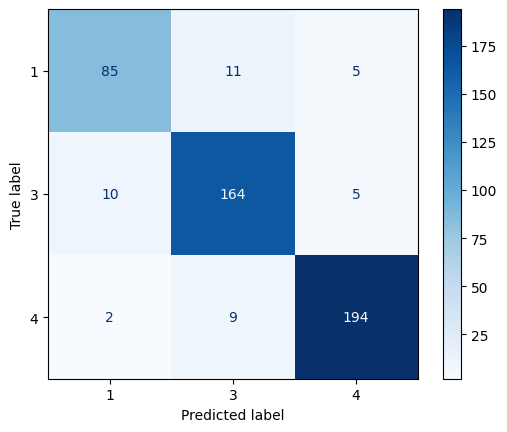

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Explicacion de los resultados del modelo:

* Opiniones correctamente vinculadas al ODS 1: 85
* Opiniones correctamente vinculadas al ODS 3: 164
* Opiniones correctamente vinculadas al ODS 4: 194
* Opiniones incorrectamente vinculadas al ODS 1: 12
* Opiniones incorrectamente vinculadas al ODS 3: 20
* Opiniones incorrectamente vinculadas al ODS 4: 10

### Conclusiones sobre el modelo de arbol de decision

El modelo de arbol de decision es bastante confiable, obteniendo una precision,f1 score y recall mayor al 0.8 en cada una de las clases. Se puede observar que en donde el modelo se desempeña peor es al clasificar opiniones vinculadas al ODS 1, esto debido al desbalance de clases que existe en los datos, pues hay menos opiniones vinculadas al ODS 1 en los datos dados. Sin embargo se puede ver que incluso con este desbalance de clases, los resultados obtenidos por este modelos son bastante buenos, y permitirian con una implementacion rapida y sencilla lograr calsificar con una buena precision a que ODS esta vinculada una opinion.